## 5. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('data_set/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.info() # 결측값 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
## 예시이므로 편의를 위해 다음과 같이 결측값 설정

# Age의 결측값을 편하게 Age의 평균으로 변경
titanic.Age.fillna(titanic.Age.mean(), inplace = True)

# Cabin의 결측값을 N으로 설정
titanic.Cabin.fillna('N', inplace = True)

# Embarked의 결측값을 N으로 설정
titanic.Embarked.fillna('N', inplace = True)

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [4]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [6]:
titanic.Cabin.value_counts()

N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
C54              1
E12              1
A20              1
D21              1
C103             1
Name: Cabin, Length: 148, dtype: int64

In [7]:
# Cabin 속성 재설정 (편의를 위해)
titanic['Cabin'] = titanic.Cabin.str[:1]

In [8]:
# 성별별 생존 인원 파악 (0 = 사망, 1 = 생존)
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

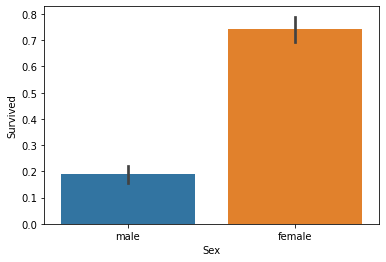

In [9]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

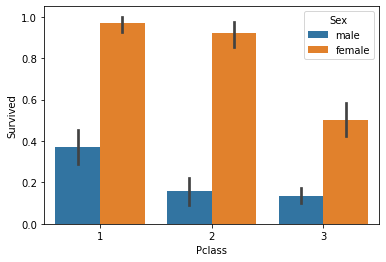

In [10]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic)

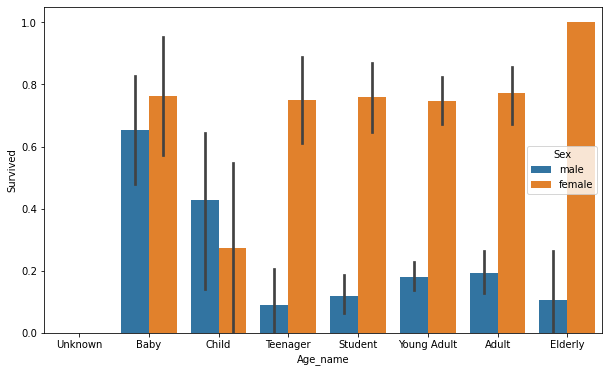

In [11]:
# 나이별 생존여부 파악

def age_category(age):
    a = ''
    if age <= -1: a = 'Unknown'
    elif age <=5: a = 'Baby'
    elif age <= 12: a = 'Child'
    elif age <= 18: a = 'Teenager'
    elif age <= 25: a = 'Student'
    elif age <= 35: a = 'Young Adult'
    elif age <= 60: a = 'Adult'
    else : a = 'Elderly'
    
    return a

# Age_name열 생성
titanic['Age_name'] = titanic.Age.apply(lambda x : age_category(x))\

# 시각화
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
plt.figure(figsize = (10,6))
sns.barplot(x = 'Age_name', y = 'Survived', hue = 'Sex', data = titanic, order = group_names)
plt.show()

In [12]:
# 남아있는 문자열 카테고리 피처를 숫자형으로 변경
from sklearn import preprocessing

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for features in features:
        a = preprocessing.LabelEncoder()
        a = a.fit(df[features])
        df[features] = a.transform(df[features])
    return df

titanic = encode_features(titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [13]:
## 지금까지 한 전처리 함수화

from sklearn.preprocessing import LabelEncoder

# Null값 처리 함수
def fillna(df):
    df.Age.fillna(df.Age.mean(), inplace = True)
    df.Cabin.fillna('N', inplace = True)
    df.Embarked.fillna('N', inplace = True)
    df.Fare.fillna(0, inplace = True)
    return df

# 머신러닝 알고리증에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# LabelEncoding
def format_features(df):
    df['Cabin'] = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        a = LabelEncoder()
        a = a.fit(df[feature])
        df[feature] = a.transform(df[feature])
    return df

# 앞서 설정한 Data Preprocessing 함수 설정
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [15]:
# 원본 데이터 재로딩 / feature 데이터 셋과 Label 데이터 셋 설정
titanic = pd.read_csv('data_set/titanic_train.csv')

X_titanic = titanic.drop('Survived', axis = 1)
y_titanic = titanic.Survived

X_titanic = transform_features(X_titanic)

In [16]:
# 학습 / 테스트 데이터 셋 설정
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic,
                                                   test_size = 0.2, random_state = 11)

In [17]:
# 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용하여 titanic 생존자 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\jinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
# KFold 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트 5개로 설정
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic)):
        # X_train 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic.values[train_index], X_titanic.values[test_index]
        y_train, y_test = y_titanic.values[train_index], y_titanic.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
    

exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [19]:
# cross_val_score()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic, y_titanic, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


`KFold`와 `cross_val_score`의 정확도가 다른 이유는 `cross_val_score`이 `StratifiedKfold`를 이용해 폴드 세트를 분할하기 때문

In [20]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


하이퍼 파라미터 변경 전보다 예측 정확도가 약 8% 증가  
하지만 일반적으로 하이퍼 파라미터를 변경해서 이정도의 증가량을 보이기는 쉽지 않음  
테스트용 데이터 세트가 작아서 가능한 사례